# Collections 

# An Array of Sequences

### Overview of Built-In Sequences:

We group sequences by mutability:
*mutable*:
- list
- dictionary

*immutable*:
- string
- tuple

Another way of grouping sequence types:

*Container sequences*
- Can hold items of different types, including nested containers, for example: *list, tuples, collection.deque*

*Flat sequences*
- Hold items of one simple type. For example, *str* and *array.array*

In [1]:
t = (9.46, 'cat', [2.08, 4.29]) #tuple
#t[0] = 1 #not possible because it's immutable
t[-1].append(1)
t[-1][-1] = 100 
#References in tuple cannot changed, but if one of those references
#points to a mutable object, and that object is changed, then the
#value of the tuple changes
t

(9.46, 'cat', [2.08, 4.29, 100])

In [2]:
from array import array # import array array.array('d', [9.46, 2.08,4.28])

arr = array('d', [9.46, 2.08,4.28])
arr.append(1)
arr[0]
#arr[-1]
arr


array('d', [9.46, 2.08, 4.28, 1.0])

- A *container sequence* holds references  to the objects it holds, which may be of any type.
- A *flat sequence* stores the value of its contents in its own memory space, not as **distinct Python object**.

Every Python object in memory has a header with metadata.
Thus, flat sequences are more compact, but they limited to one simple type.



![flat_vs_container_seq](flat_vs_container_seq.png)



## List Comprehension

A quick way of build a squence is using list comprehension (*listcomp*).

In [3]:
result = []
for i in range(5):
    result.append(i*'A')

result

['', 'A', 'AA', 'AAA', 'AAAA']

In [4]:
result = [i*'A' for i in range(5)]
# [element processing  for loop ]
result

['', 'A', 'AA', 'AAA', 'AAAA']

In [5]:
result = [i*'A' for i in range(5) if i > 3]
# [element processing  for loop ]
result

['AAAA']

A for loop can be used to do many different things: scanning, count or any number of other tasks.
In contrast, a listcomp is more explicit. Its goal is **always** to build a new list.

## Mapping and Filtering with Listcomps 

In [6]:
strings = ['Hello', 'world', 'again', 'bla'] #-> [5, 5, 5, 3]
length = [len(word) for word in strings]
length

[5, 5, 5, 3]

In [7]:
upper_list = [word.upper() for word in strings]
upper_list

['HELLO', 'WORLD', 'AGAIN', 'BLA']

In [8]:
def map_list(item):
    return item.upper()

list(map(map_list, strings))

['HELLO', 'WORLD', 'AGAIN', 'BLA']

Lets look at nested lists:

In [9]:
list_numbers = [[5, 6, 3], [8, 3, 1], [9, 10, 4], [8, 4, 2]]

Lets calculate the sum of each list by mapping each element to its length: 
```list_numbers -->  [14, 12, 23, 14]```


In [10]:
[sum(list_num) for list_num in list_numbers ]

[14, 12, 23, 14]

## Filter

In [11]:
list_numbers = [[5, 6, 3], [8, 3, 1], [9, 10, 4], [8, 4, 2], [1,2]]

In [12]:
length_gte_3 = [list_num for list_num in list_numbers if len(list_num) >= 3]
length_gte_3

[[5, 6, 3], [8, 3, 1], [9, 10, 4], [8, 4, 2]]

In [13]:
strings = ['Hello', 'world', 'again', 'bla']

length_gt_3 = [word for word in strings if len(word) <= 3 ]
length_gt_3

['bla']

### Cartasian Products

![cartasian_prod](cartasian_prod.png)

In [14]:
A = ['x', 'y', 'z']
B = [1, 2, 3]

def cartasian_prod(A,B):
    result = []
    for item1 in A:
        for item2 in B:
            result.append((item1, item2))
    return result

cartasian_prod(A, B)


[('x', 1),
 ('x', 2),
 ('x', 3),
 ('y', 1),
 ('y', 2),
 ('y', 3),
 ('z', 1),
 ('z', 2),
 ('z', 3)]

Now let's do this with listcomps


In [15]:
def cartasian_prod(A,B):
    return [(item1, item2) for item1 in A 
                            for item2 in B]
# This generates a list of tuples arranged by letter,then numbers
cartasian_prod(A, B)

[('x', 1),
 ('x', 2),
 ('x', 3),
 ('y', 1),
 ('y', 2),
 ('y', 3),
 ('z', 1),
 ('z', 2),
 ('z', 3)]

In [16]:
def cartasian_prod(A,B):
    return [(item1, item2) for item2 in B
                               for item1 in A]
# To get the items arranged by numbers, then letters,
#just rearrange the for clauses
cartasian_prod(A,B)

[('x', 1),
 ('y', 1),
 ('z', 1),
 ('x', 2),
 ('y', 2),
 ('z', 2),
 ('x', 3),
 ('y', 3),
 ('z', 3)]

### Building List of Lists

In [17]:
board = [ ['_' for i in range(3)] for j in range(3) ]
#[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]
board

board[1][2] = 'X'
board


[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [18]:
board = [ ['_', '_', '_']  for i in range(3) ]
board = [ ['_'] * 3  for i in range(3) ]
board[1][2] = 'X'
print(board)

print(id(board[0]) ,id(board[1]), id(board[2]))

row = ['_', '_','_']
print(id(row))
board_row = [ row for i in range(3) ]
board_row[1][2] = 'O'

print(board_row)
print(id(board_row[0]) ,id(board_row[1]), id(board_row[2]))




[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]
140235986108736 140235986110016 140235986109824
140235986108544
[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]
140235986108544 140235986108544 140235986108544


A tempting, but wrong, shortcut:

In [19]:
weird_board = [['_', '_', '_']] * 3 #The outer list is made of three
#references to the same inner list
weird_board
weird_board[1][2] = 'O' #all rows are aliases referring to the same 
#object
weird_board

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

In [20]:
row = ['_', '_','_']
weird_board = []
for i in range(3):
    weird_board.append(row)
    
weird_board
weird_board[1][2] = 'O'
weird_board

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

### list.sort Versus sort Built-In
The list.*sort* method sorts a list in place. 

In contrast, the built-in function *sorted* creates a new list and returns it. 
It accepts any iterable object as an argument, including immutable sequences.

Both list.*sort* and *sorted*  take two optional, keyword-only arguments:

- reverse: accepts a boolean. The default is False
- key: accepts a one-arguments function 


In [21]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
new_List = sorted(fruits) #returns a new list, which is sorted
new_List

['apple', 'banana', 'grape', 'raspberry']

In [22]:
sorted(fruits, reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [23]:
sorted(fruits, key=len)

['grape', 'apple', 'banana', 'raspberry']

In [24]:
sorted(fruits, key=len, reverse=True)

['raspberry', 'banana', 'grape', 'apple']

In [25]:
fruits.sort() # changes the fruits list in place
fruits
#print(fruits.sort())
fruits.reverse()
fruits

['raspberry', 'grape', 'banana', 'apple']

In [26]:
books = [('hello', 3), ('world', 1), ('again', 2)]

def sort_helper(item):
    return item

sorted(books, key=sort_helper)


[('again', 2), ('hello', 3), ('world', 1)]

### Tuples as Immutabl Lists

Two benefits:

- *Clarity*: you know its length will never change
- *Performance*: A tuple uses less memory than a list of the same length, and it allows Python to do some optimizations.
- fixed length: a tuple instance is allocated the exact memory space it needs.
- in contrast instances of list are allocated with room to spare in case for future appends

In [27]:
a = (10, 'alpha', [1, 2])
a[0] = 'Bla'

TypeError: 'tuple' object does not support item assignment

In [28]:
a[-1][1] = 'Bla' #References in a tuple cannot changed, but if one of those ponits to a mutable object, 
#and that object is changed, then the value of the tuple changes.
a

(10, 'alpha', [1, 'Bla'])

### Tuples as Records

- used as records with no field names
- each item in the tuple holds the data for one field, and the position of the item gives its meaning.

In [29]:
lax_coordinates = (33.94, -118.48) # Latitude and Lonigtude

In [30]:
travelers_ids = [ ('USA', '098098'), ('BRA', '979879'), ('ESP', '324981')]

In [31]:
for passport in sorted(travelers_ids):
    print('%s /%s' % passport)
    #print(f"{passport[0]} /{passport[1]}")

BRA /979879
ESP /324981
USA /098098


In [32]:
x = 'Hello'
print('%s World' % x)
print(f"{x} World")
print(f"{lax_coordinates[0]} / {lax_coordinates[1]}")

Hello World
Hello World
33.94 / -118.48


In [33]:
latitude, longitude = lax_coordinates # unpacking the tuple
latitude

33.94

In [34]:
for country, _ in travelers_ids:
    print(country)
    #The for loop knows how to retrieve the items of a tuple separately-this called unpacking

USA
BRA
ESP


### for passport in sorted(travelers_ids):
    country, _ = passport
    print(country)

## Classic Named Tuples

The collections.namedtuple functions builds a subclass of tuple enhanced with field names.

- Each instance of a class built by namedtuple takes exactly the same amount of memory as a tuple

In [35]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates') # class name and field names
tokyo = City('Tokyo_w', 'JP', 136000000, (35.689, 139.691))
print(tokyo)
 
city_tuple = ('Tokyo_w', 'JP', 136000000, (35.689, 139.691))#normal tuple
city_namedtuple = City('Tokyo_w', 'JP', 136000000, (35.689, 139.691)) #namedtuple


#tokyo = City('Tokyo', 'JP', [136000000], (35.689, 139.691)) 

#tokyo.population[0] = 1
tokyo2 = tokyo._replace(population=1) #returns a value, but does not change the variable in place
tokyo2

City(name='Tokyo_w', country='JP', population=136000000, coordinates=(35.689, 139.691))


City(name='Tokyo_w', country='JP', population=1, coordinates=(35.689, 139.691))

In [36]:
tokyo.population #access the fields by name

136000000

In [37]:
tokyo[2] #access fields by position

136000000

In [38]:
tokyo[2] = 'Bla'

TypeError: 'City' object does not support item assignment

In [39]:
tokyo = City('Tokyo', 'JP', 136000000, (35.689, 139.691))
tokyo 

City(name='Tokyo', country='JP', population=136000000, coordinates=(35.689, 139.691))

In [40]:
tokyo._asdict()

{'name': 'Tokyo',
 'country': 'JP',
 'population': 136000000,
 'coordinates': (35.689, 139.691)}

In [41]:
class my_City:
    def __init__(self, name, country, population, coordinates):
        self.name = name
        self.country = country
        self.population = population
        self.coordinates = coordinates
        
tokyo = my_City('Tokyo_w', 'JP', 136000000, (35.689, 139.691))
tokyo.name


'Tokyo_w'

## When a List Is Not the Answer

The list type is flexible and easy to use, but depending on specific requirements, there are better options.

For example, if you are constantly adding and removing items from opposite ends of a list, it's good to know that a *deque* (double-ended queue) is a more efficient FIFO (First in, first out) data structure. 


![q](queue.png)

In [ ]:
myList = []

myList.append(1) #first-in
myList.append(2)
myList.append(3)

myList.pop(0) #first out


## Deques

The *.append* and *.pop* methods makea list usable as a queue.

But inserting and removing from the head of a list (0-index end) is costly because the entire list must be shifted in memory.

The class *collections.deque* is a queue designed for fast inserting and removing from both ends.

In [51]:
from collections import deque

dq = deque(range(9, 0, -1))

In [52]:
dq

deque([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [53]:
dq.appendleft(10)
dq

deque([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [57]:
dq.pop()
dq

deque([10, 9, 8, 7, 6, 5])

In [66]:
dq = deque(range(1, 0, -1))

%timeit dq.append(None); dq.popleft()


86.4 ns ± 2.56 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [59]:
l  = list(range(1))

%timeit l.append(None); l.pop(0) 

132 ns ± 2.88 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [61]:
import timeit

In [65]:
timeit.repeat(setup = '',
             stmt = 'list(range(1000)) ',
             repeat = 3,
             number = 1000)

[0.013742542825639248, 0.01581695512868464, 0.013576966943219304]

In [71]:
setup_queue = "from collections import deque;dq = deque(range(100,0,-1))"
fifo_queue = "dq.appendleft(None); dq.pop()"

queue_time = timeit.repeat(setup = setup_queue,
             stmt = fifo_queue,
             repeat = 3,
             number = 1000)

queue_time

queue_mean = sum(queue_time) / len(queue_time)

setup_list = "l = list(range(100, 0,-1))"
fifo_list = "l.append(None);l.pop(0)"

list_time = timeit.repeat(setup = setup_list,
             stmt = fifo_list,
             repeat = 3,
                number = 1000)

list_mean = sum(list_time) / len(list_time)

queue_mean, list_mean

(7.648665147523086e-05, 0.00011336912090579669)

In [73]:
def time_it(N):
    setup_queue = f"from collections import deque;dq = deque(range({N},0,-1))"
    fifo_queue = "dq.appendleft(None); dq.pop()"

    queue_time = timeit.repeat(setup = setup_queue,
             stmt = fifo_queue,
             repeat = 3,
             number = 1000)

    queue_mean = sum(queue_time) / len(queue_time)

    setup_list = f"l = list(range({N}, 0,-1))"
    fifo_list = "l.append(None);l.pop(0)"

    list_time = timeit.repeat(setup = setup_list,
             stmt = fifo_list,
             repeat = 3,
                number = 1000)

    list_mean = sum(list_time) / len(list_time)

    return queue_mean, list_mean

In [77]:
time_it(100000)

(7.657768825689952e-05, 0.029747279128059745)

In [79]:
x = [10, 100, 1000, 10000, 100000]

for N in x:
     print(N,time_it(N))

10 (7.361895404756069e-05, 0.00010076599816481273)
100 (7.35050222525994e-05, 0.00010643263037006061)
1000 (7.667695172131062e-05, 0.00023668368036548296)
10000 (7.654167711734772e-05, 0.002888342676063379)
100000 (8.208762543896835e-05, 0.029514842589075368)


 Our deque remains constant in time in regards to fifo behavior. We have a complexity of O(1)
 Fifo behaviour takes more time as the number of elements in a list increase. We have a complexity of O(N).
 
Note that deque implements most of the list methods, and adds a few that are specific to its design, like appendleft. 

But there is a hidden cost: removing items from the middle of a deque is not as fast.

 
 ![](queue_vs_list.png)

### The Awesome zip



In [1]:
zip(range(3), 'ABC')

In [2]:
list(zip(range(3), 'ABC'))

[(0, 'A'), (1, 'B'), (2, 'C')]

In [3]:
list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3]))

[(0, 'A', 0.0), (1, 'B', 1.1), (2, 'C', 2.2)]

In [11]:
from itertools import zip_longest
'''The itertools.zip_longest function behaves differently: it
uses an optional fillvalue (None by default) to complete
missing values so it can generate tuples until the last iterable is
exhausted.'''
list(zip_longest(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3], fillvalue='BLA'))

[(0, 'A', 0.0), (1, 'B', 1.1), (2, 'C', 2.2), ('BLA', 'BLA', 3.3)]

In [8]:
list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3], strict=True))

TypeError: zip() takes no keyword arguments

In [ ]:
#list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3], strict=True)) #works in python3.10 and raises an error if the 
#iterables are of unequal length

In [10]:
A = [(1,3,5),
     (2,4,6)]

A_transposed = list(zip(*A))

[(1, 2), (3, 4), (5, 6)]

![](Matrix_transpose.gif)

In [2]:
list(zip([1,2,3], 'ABC'))

[(1, 'A'), (2, 'B'), (3, 'C')]

### enumerate

*enumerate(iterable, start=0)* Yields 2-tuples of the form (index, item), where index is counter from start, and items is taken from the iterable

In [4]:
list(enumerate('ABC'))

[(0, 'A'), (1, 'B'), (2, 'C')]

In [5]:
list(enumerate('ABC', start=1))

[(1, 'A'), (2, 'B'), (3, 'C')]

In [8]:
for t in enumerate('ABC', start=1):
    
    index, char = t
    print(index)
    print(char)

1
A
2
B
3
C


In [9]:
for index, char in enumerate('ABC', start=1):
    print(index)
    print(char)

1
A
2
B
3
C


### Other Functions Which Take Iterables As an Argument

*all(iterable)*

    Returns True if there are no falsy elements in the iterable; all([]) returns True

In [10]:
l1 = ['', 'Hello']
all(l1)

False

In [34]:
l1 = ['World', 'Hello', 0]
all(l1)

False

In [33]:
falsy = []
all([ ])

True

In [18]:
bool(0)

False

In [19]:
bool([])

False

In [20]:
bool('')

False

In [21]:
bool(None)

False

In [23]:
l1 = [[]]
bool(l1[0])

False

*any(iterable)*

    Returns True if any element of the iterable is truthy; any([]) returns False.

In [24]:
l1 = [1,2, '']
any(l1)

True

In [25]:
l1 = ['', []]
any(l1)

False

In [26]:
any([])

False

In [27]:
any([[]])

False

In [28]:
any([[],'b'])

True

In [32]:
l33t = ['Digital Car33r Institute', 'DCI', 'Digital', 'Career', 'Inst1tut3']

for string in l33t:
    print(any([char.isdigit() for char in string]))


True
False
False
False
True


### Exercise

Refactor Task 10 and use the any function. 

## Higher Order Functions

- a function that takes a function as an argument

In the functional programming paradigma, some of the best known higher-order functions are map, filter, reduce.

In [68]:
import math

def exp(x):
    return math.exp(x)

def cos(x):
    return math.cos(x)


x = [i/10 for i in range(1,120)]
y = list(map(exp, x))
y_cos = list(map(cos, x))

#list(zip(x,y))

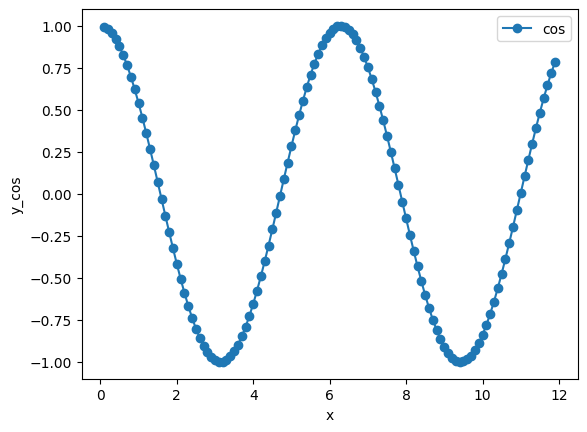

In [69]:
import matplotlib.pyplot as plt

plt.plot(x, y_cos, marker='o', label="cos")
plt.legend()
plt.xlabel('x')
plt.ylabel('y_cos')
plt.show()

In [70]:
list_of_t = [(1, 'bla'), (2, 'blu')]

def get_second(item):
    return item[1]

list(map(get_second, list_of_t))

['bla', 'blu']

## Filter

In [76]:
list2 = [0,1,2,3,4,5,6,7,8,9,10]

def filter_helper(item):
    return item % 2 == 0

list(filter(filter_helper, list2))

[0, 2, 4, 6, 8, 10]

### Map and Filter combined

 

In [77]:
list(map(exp, filter(filter_helper, list2)))

[1.0,
 7.38905609893065,
 54.598150033144236,
 403.4287934927351,
 2980.9579870417283,
 22026.465794806718]

In [79]:
[exp(x) for x in list2 if x % 2 == 0]

[1.0,
 7.38905609893065,
 54.598150033144236,
 403.4287934927351,
 2980.9579870417283,
 22026.465794806718]

In [97]:
from functools import reduce

def adding(accumulator, currentvalue):
    print(f"{accumulator} + {currentvalue} = {accumulator + currentvalue}")
    return accumulator + currentvalue

def multiply(accumulator, currentvalue):
    print(f"{accumulator} * {currentvalue} = {accumulator * currentvalue}")
    return accumulator * currentvalue

print(sum([1,2,3]))
reduce(multiply, [1,2,3,'str'])


6
1 * 2 = 2
2 * 3 = 6
6 * str = strstrstrstrstrstr


'strstrstrstrstrstr'

## Anonymous Functions

The lambda keyword creates an anonymous function within a Python expression.
However, the body if a lambda function is limited and statements such as while, etc can't be used.

The best use of anonymous functions is in the context of an argument list for a higher-order function.

In [98]:
fruits = ['strawberry', 'fig', 'apple', 'cherry', 'raspberry', 'banana']

def sort_helper(word):
    return word[::-1]

sorted(fruits, key=sort_helper)

['banana', 'apple', 'fig', 'raspberry', 'strawberry', 'cherry']

In [102]:
sort_lambda_helper = lambda word: word[::-1]
sort_lambda_helper

<function __main__.<lambda>(word)>

In [103]:
sorted(fruits, key=sort_lambda_helper)

['banana', 'apple', 'fig', 'raspberry', 'strawberry', 'cherry']

In [105]:
books = [('hello', 3), ('world', 1), ('again', 2)]

def sort_helper(item):
    return item[1]

sorted(books, key=sort_helper)
sorted(books, key=lambda item: item[1])


[('world', 1), ('again', 2), ('hello', 3)]

In [108]:
def cos(x):
    return math.cos(x)


x = [i/10 for i in range(1,10)]
y_cos = list(map(cos, x))
print(y_cos)
list(map( lambda n: math.cos(n),x))

[0.9950041652780258, 0.9800665778412416, 0.955336489125606, 0.9210609940028851, 0.8775825618903728, 0.8253356149096783, 0.7648421872844885, 0.6967067093471654, 0.6216099682706644]


[0.9950041652780258,
 0.9800665778412416,
 0.955336489125606,
 0.9210609940028851,
 0.8775825618903728,
 0.8253356149096783,
 0.7648421872844885,
 0.6967067093471654,
 0.6216099682706644]

In [109]:
list2 = [0,1,2,3,4,5,6,7,8,9,10]

def filter_helper(item):
    return item % 2 == 0

list(filter(filter_helper, list2))

[0, 2, 4, 6, 8, 10]

In [110]:
list(filter(lambda item: item % 2 == 0, list2))

[0, 2, 4, 6, 8, 10]